# SemEval 2023 Dataset Analysis

In this notebook the SemEval 2023 dataset is analyzed.

In [1]:
# load json file as df from ../../data/mfc/immigration_labeled_preprocessed.json
import pandas as pd

df_sentence = pd.read_json('../../data/semeval/muse-dlf/semeval_train.json')

In [2]:
df_sentence.columns

Index(['article_id', 'text', 'type', 'Capacity_and_resources',
       'Crime_and_punishment', 'Cultural_identity', 'Economic',
       'External_regulation_and_reputation', 'Fairness_and_equality',
       'Health_and_safety', 'Legality_Constitutionality_and_jurisprudence',
       'Morality', 'Policy_prescription_and_evaluation', 'Political',
       'Public_opinion', 'Quality_of_life', 'Security_and_defense'],
      dtype='object')

In [3]:
# group by article id: 
# - join "article_text" and take the first of all other columns

df = df_sentence.groupby('article_id').agg({
    'article_id': 'first',
    'text': ' '.join,
    'type': 'first',
    'Capacity_and_resources': 'first',
       'Crime_and_punishment': 'first', 'Cultural_identity': 'first', 'Economic': 'first',
       'External_regulation_and_reputation': 'first', 'Fairness_and_equality': 'first',
       'Health_and_safety': 'first', 'Legality_Constitutionality_and_jurisprudence': 'first',
       'Morality': 'first', 'Policy_prescription_and_evaluation': 'first', 'Political': 'first',
       'Public_opinion': 'first', 'Quality_of_life': 'first', 'Security_and_defense': 'first'
})

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

## Frame Distribution

In [5]:
# Summing up the occurrences of each frame
frame_counts = df.iloc[:, 3:].sum()

# Calculating relative percentages
total_frames = frame_counts.sum()
frame_distribution = pd.DataFrame({
    "Absolute": frame_counts,
    "Relative (%)": (frame_counts / total_frames * 100).round(2)
})

# Print the tables
print("Frame Distribution Table:")
print(frame_distribution)

Frame Distribution Table:
                                              Absolute  Relative (%)
Capacity_and_resources                              29          1.80
Crime_and_punishment                               227         14.06
Cultural_identity                                   31          1.92
Economic                                            28          1.73
External_regulation_and_reputation                 121          7.49
Fairness_and_equality                              115          7.12
Health_and_safety                                   61          3.78
Legality_Constitutionality_and_jurisprudence       203         12.57
Morality                                           203         12.57
Policy_prescription_and_evaluation                  65          4.02
Political                                          235         14.55
Public_opinion                                      23          1.42
Quality_of_life                                     87          5.39
Security

## Type Distribution

In [6]:
# Summing up the occurrences of each type
type_counts = df['type'].value_counts()

# Calculating relative percentages
total_types = type_counts.sum()
type_distribution = pd.DataFrame({
    "Absolute": type_counts,
    "Relative (%)": (type_counts / total_types * 100).round(2)
})

print("Type Distribution Table:")
print(type_distribution)

Type Distribution Table:
           Absolute  Relative (%)
type                             
opinion         382         88.22
reporting        41          9.47
satire           10          2.31


## "frame" on "frame" Distribution (Absolute and Relative)

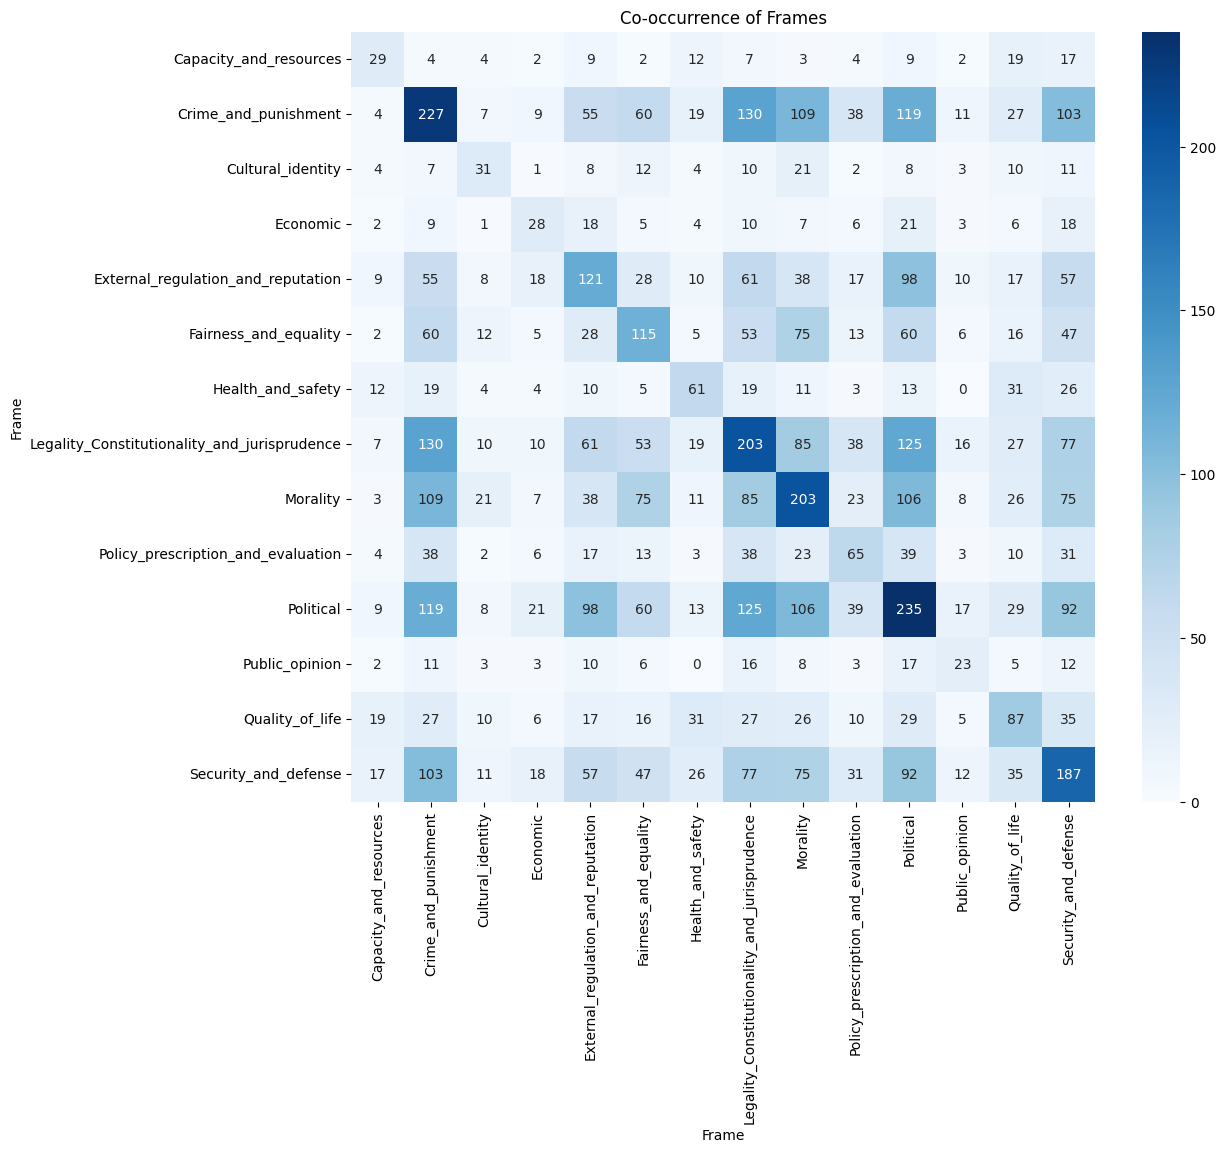

In [7]:
# Selecting only the frames columns
frames_df = df.iloc[:, 3:]

# Creating a co-occurrence matrix
co_occurrence_matrix = frames_df.T.dot(frames_df)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Co-occurrence of Frames')
plt.ylabel('Frame')
plt.xlabel('Frame')
plt.show()

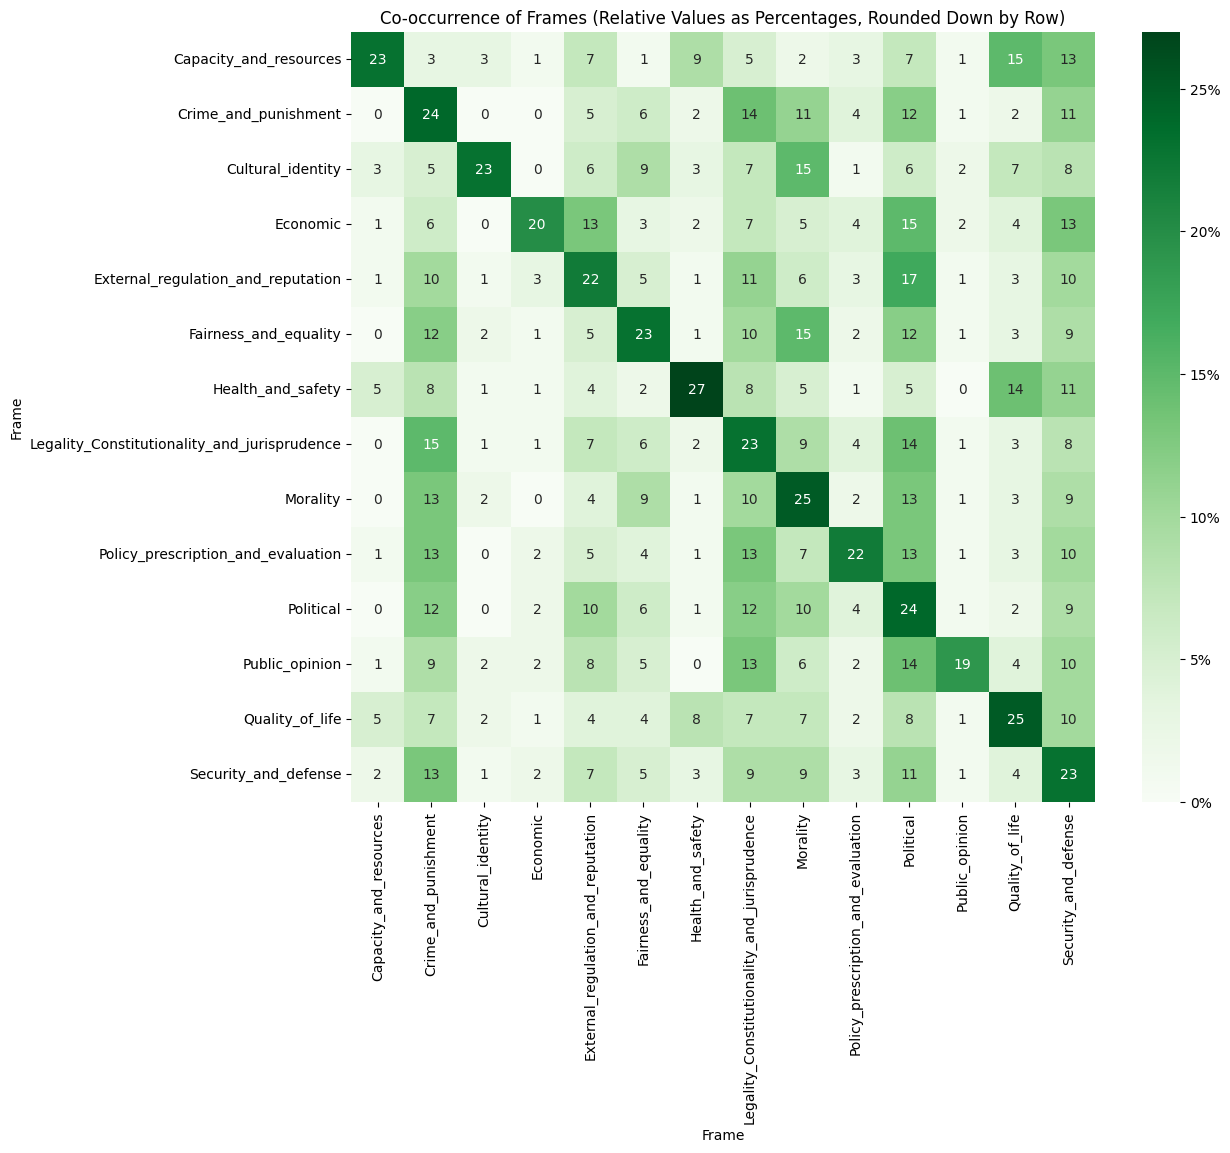

In [8]:
import numpy as np

# Selecting only the frames columns
frames_df = df.iloc[:, 3:]

# Creating a co-occurrence matrix
co_occurrence_matrix = frames_df.T.dot(frames_df)

# Normalize the co-occurrence matrix to relative values by rows
co_occurrence_relative_by_row = co_occurrence_matrix.div(co_occurrence_matrix.sum(axis=1), axis=0)

# Plotting the heatmap with relative values as percentages rounded down
plt.figure(figsize=(12, 10))
sns.heatmap(np.floor(co_occurrence_relative_by_row * 100), annot=True, fmt=".0f", cmap="Greens", cbar_kws={'format': '%.0f%%'})
plt.title('Co-occurrence of Frames (Relative Values as Percentages, Rounded Down by Row)')
plt.ylabel('Frame')
plt.xlabel('Frame')
plt.show()

## "frame" on "type" Distribution (Absolute and Relative)

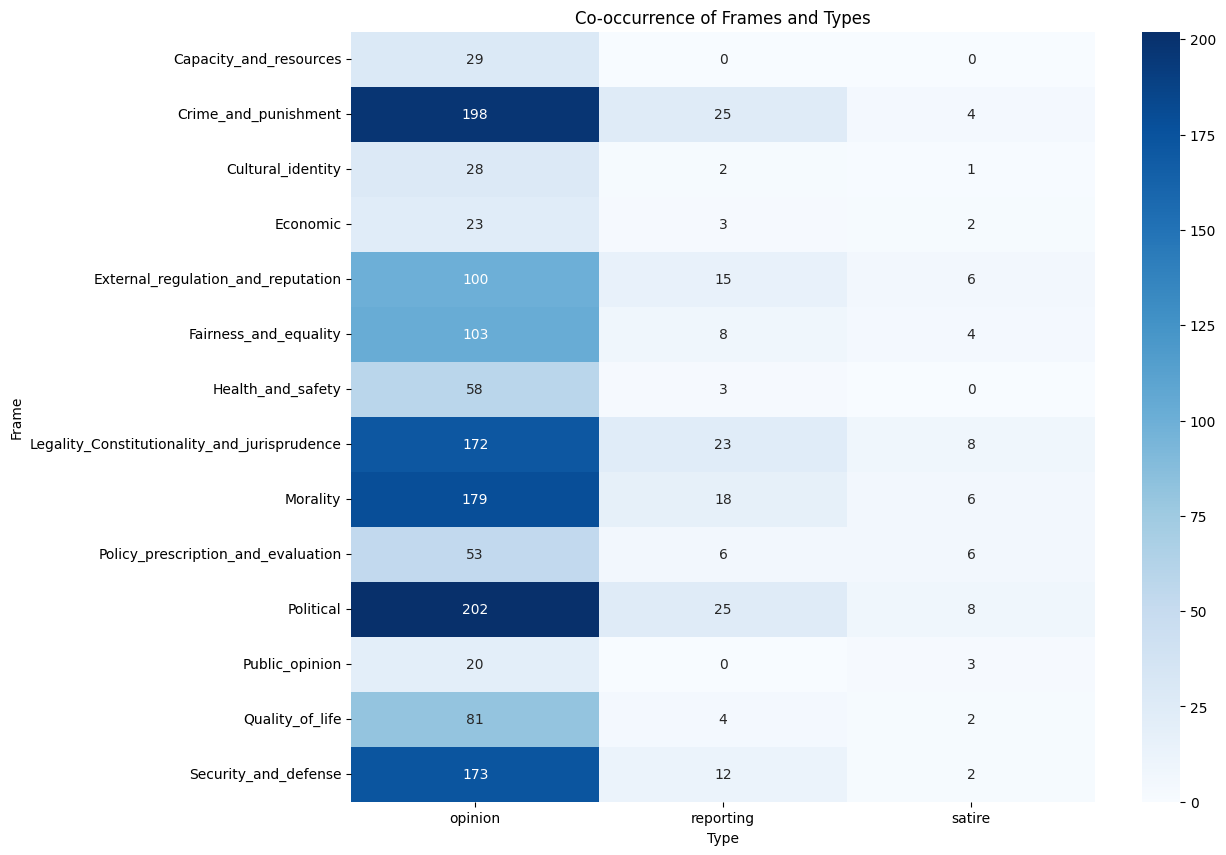

In [9]:
# Selecting only the frames columns
frames_df = df.iloc[:, 2:]

# Creating a co-occurrence matrix between frames and types
type_frame_matrix = frames_df.groupby('type').sum().T

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(type_frame_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Co-occurrence of Frames and Types')
plt.ylabel('Frame')
plt.xlabel('Type')
plt.show()

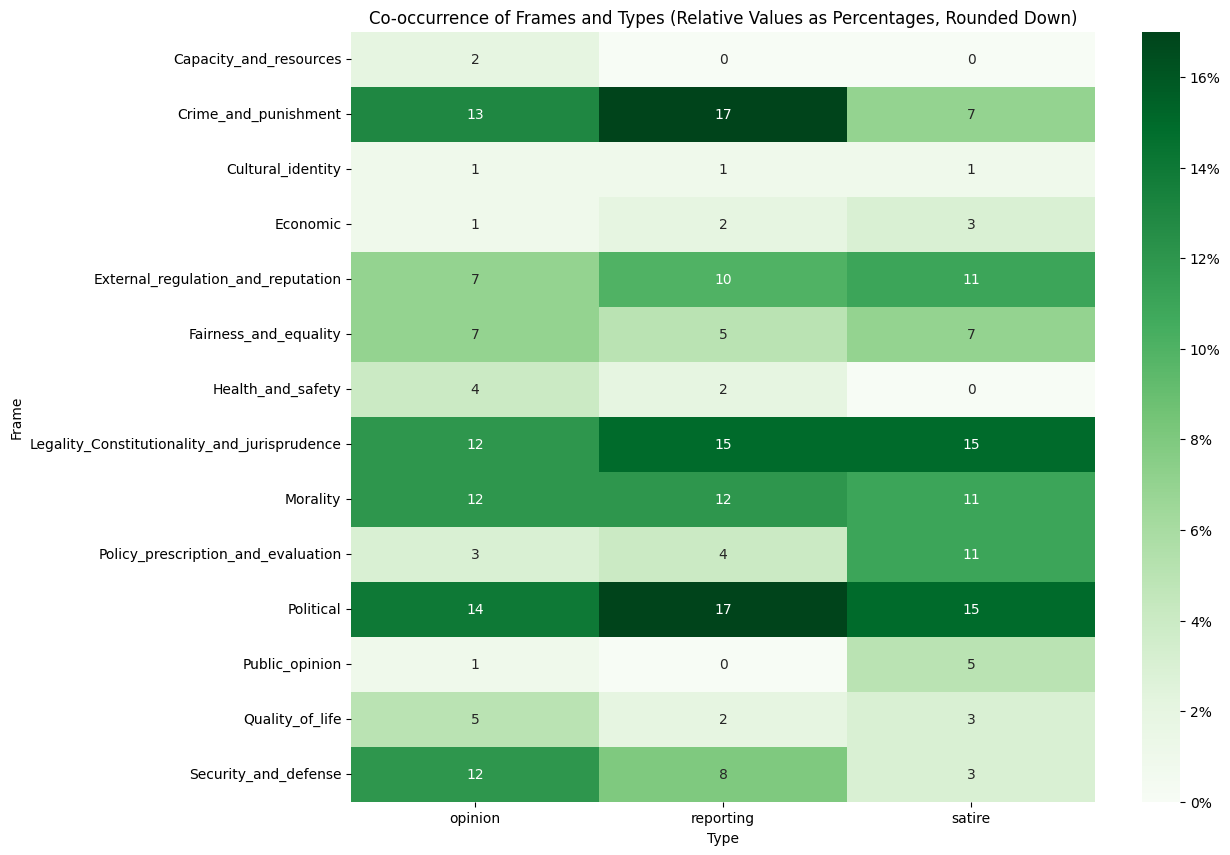

In [10]:
# Selecting only the frames columns
frames_df = df.iloc[:, 2:]

# Creating a co-occurrence matrix between frames and types
type_frame_matrix = frames_df.groupby('type').sum().T

# Normalize the type-frame matrix to relative values by columns (types)
type_frame_relative = type_frame_matrix.div(type_frame_matrix.sum(axis=0), axis=1)

# Plotting the heatmap with relative values as percentages rounded down
plt.figure(figsize=(12, 10))
sns.heatmap(np.floor(type_frame_relative * 100), annot=True, fmt=".0f", cmap="Greens", cbar_kws={'format': '%.0f%%'})
plt.title('Co-occurrence of Frames and Types (Relative Values as Percentages, Rounded Down)')
plt.ylabel('Frame')
plt.xlabel('Type')
plt.show()


## Number of Articles

In [11]:
num_articles = len(df)
articles_table = pd.DataFrame({"Total Articles": [num_articles]})
print(articles_table)


   Total Articles
0             433


## Text Length, Number of Sentences, Words/Chars per Sentence

In [15]:
import pandas as pd
import nltk
nltk.download('punkt')

# Calculating text length in words and characters
df['text_length_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculating number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Calculating average words per sentence
df['words_per_sentence'] = df.apply(lambda x: x['text_length_words'] / x['num_sentences'] if x['num_sentences'] > 0 else 0, axis=1)

# Descriptive statistics including quantiles
text_stats = df[['text_length_words', 'num_sentences', 'words_per_sentence']].describe(percentiles=[.25, .5, .75, .90, .95, .99])
print(text_stats)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       text_length_words  num_sentences  words_per_sentence
count         433.000000     433.000000          433.000000
mean         1053.618938      39.018476           27.706203
std           988.377594      35.560911            7.091084
min           120.000000       4.000000           13.391304
25%           511.000000      19.000000           23.000000
50%           805.000000      30.000000           26.760000
75%          1174.000000      44.000000           31.185185
90%          2041.800000      69.400000           37.368455
95%          2689.600000     108.800000           40.477314
99%          5173.000000     166.760000           46.911058
max          8797.000000     408.000000           69.500000


# SRL Analysis

Analyzing the SRL data.

In [16]:
# read file from data\srls\mfc\mfc_labeled.pkl

df_srl = pd.read_pickle('../../data/srls/semeval/semeval_train.pkl')

In [17]:
df_srl.head()

,article_id,text,srls
0,111111111,Next plague outbreak in Madagascar could be 's...,"[{'predicate': 'be', 'ARG0': '', 'ARG1': 'Next..."
1,111111111,Geneva - The World Health Organisation chief o...,"[{'predicate': 'said', 'ARG0': 'Geneva - The W..."
2,111111111,"An outbreak of both bubonic plague, which is s...","[{'predicate': 'spread', 'ARG0': 'by infected ..."
3,111111111,The disease tends to make a comeback each hot ...,"[{'predicate': 'tends', 'ARG0': '', 'ARG1': 'T..."
4,111111111,"On average, between 300 and 600 infections are...","[{'predicate': 'recorded', 'ARG0': '', 'ARG1':..."


In [18]:
# Function to count arguments in each sentence
def count_args(srls):
    count = 0
    for srl in srls:
        if srl['predicate'] and (srl['ARG0'] or srl['ARG1']):
            count += sum([1 for key in ['ARG0', 'ARG1'] if srl[key]])
    return count

# Apply the function to each row
df_srl['arg_count'] = df_srl['srls'].apply(count_args)

# Calculate descriptive statistics
statistics = df_srl['arg_count'].describe(percentiles=[.25, .5, .75, .95, .99])
print(statistics)

count    16892.000000
mean         4.956488
std          4.210656
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
95%         13.000000
99%         20.000000
max         42.000000
Name: arg_count, dtype: float64
